# What is axes.acorr()

Welcome to the class. Today we will talk about acorr() method.
__acorr()__ plots __AUTOCORRELATION__, also called as __SERIAL CORRELATION__ of a single feature (independent variable) and it is used in timeseries analysis. Think about it. Sometimes the past is the best predictor of the future. That's exactly what the __acorr()__ is about in a nutshell.

Let's create a simple example and try interpreting the result.

In [1]:
# Import required packages
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read a csv file
d = pd.read_csv('Data/acorr.csv')

# Let's take a look
d = d.astype({'month':'category', 'price':'float64'})
d.head()

,month,price
0,Jan,1.0
1,Feb,2.0
2,Mar,3.0
3,Apr,4.0
4,May,5.0


(0, 7)

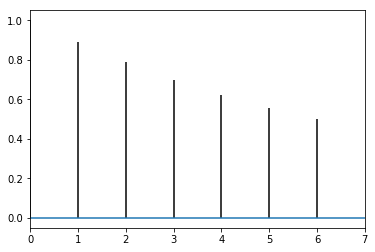

In [3]:
fig, ax1 = plt.subplots()

ax1.acorr(d.price, maxlags=6)
ax1.set_xlim(0, 7)

Now, let me explain what we did one by one.  
1. When you are plotting autocorrelation, you pass only one variable, which we did by passing only Val column of the dataframe.
2. I also set the maxlags to 6. Because it is best to use one and up to n/4 lags. In our case we have 24 entries, and if you divide 24 by 4, you will get 6. Anything beyond n/4 will be statistically unreliable (Box and Jenkins, 1970)
3. I also set xlim to start form 0, because we are not interested in seeing a mirror effect on the negative side of the X and Y axis.

Now, it is time to interpret the chart. Since all the values above 0, we have grounds to assume that preceding price affects the succeeding price formation, hence auto-correlated.

Also, I suggest you read the documentation. Call help function

In [47]:
help(ax1.acorr)

Help on method acorr in module matplotlib.axes._axes:

acorr(x, *, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot the autocorrelation of `x`.
    
    Parameters
    ----------
    
    x : sequence of scalar
    
    hold : boolean, optional, *deprecated*, default: True
    
    detrend : callable, optional, default: `mlab.detrend_none`
        x is detrended by the `detrend` callable. Default is no
        normalization.
    
    normed : boolean, optional, default: True
        if True, input vectors are normalised to unit length.
    
    usevlines : boolean, optional, default: True
        if True, Axes.vlines is used to plot the vertical lines from the
        origin to the acorr. Otherwise, Axes.plot is used.
    
    maxlags : integer, optional, default: 10
        number of lags to show. If None, will return all 2 * len(x) - 1
        lags.
    
    Returns
    -------
    (lags, c, line, b) : where:
    
      - `lags` are a length 2`ma

## Enrich the chart with more info

If you read the documentation, __acorr__ returns 4 items.
1. Lags (xtick labels)
2. Coefficients of the lines
3. Line2D instance
4. x-axis

Let's  add coefficients to the chart

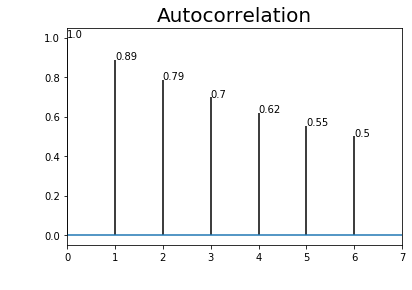

In [112]:
fig, ax1 = plt.subplots()
(lags, c, line, b) = ax1.acorr(d.price, maxlags=6)

# Formatting the chart
ax1.set_xlim(0, 7)
ax1.set_title('Autocorrelation', size=20)

for i, j in zip(lags, c):
    ax1.annotate(str(round(j, 2)), (i,j))

Alright, that's all about autocorrelation. If you have any questions, please let me know and bye for now.